# 讀取圖片和格式

In [1]:
%matplotlib inline
import numpy as np
from skimage import data, exposure, img_as_float
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import misc

#可以用匯入練習圖
#from scipy import misc
#face = misc.face()
#misc.imsave('face.png', face) 



#由於接下來的操作都是用ndarray形式在做，所以要用這樣開啟
img = misc.imread('0.jpg')
print type(img)  #看格式
print img.shape, img.dtype #詳細格式
print img.mean() #平均值
print img.max()
print img.min() #最大最小值

<type 'numpy.ndarray'>
(640L, 640L, 3L) uint8
147.868911133
255
0


# 建立raw檔

In [2]:
img.tofile('0.raw') # 創建raw文件
img_from_raw = np.fromfile('0.raw', dtype=np.uint8)
img_from_raw.shape   #這裡建立的是甚麼我真的不知道= ="
#而且好像建了之後就會有問題....

(1228800L,)

# 並讀取

In [3]:
img_from_raw.shape = (640, 640, 3)
img_memmap = np.memmap('0.raw', dtype=np.uint8, shape=(640, 640, 3))

# 灰階

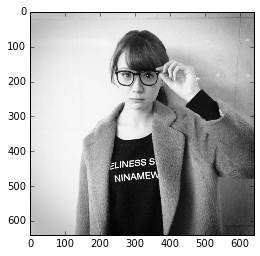

In [4]:
img = misc.imread('0.jpg','gray')
plt.imshow(img, cmap=plt.cm.gray)

# 隨機畫圖

In [7]:

for i in range(10):
    im = np.random.random_integers(0, 255, 10000).reshape((100, 100))
    misc.imsave('random_%02d.png' % i, im)
from glob import glob
filelist = glob('random*.png')
filelist.sort()

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: This function is deprecated. Please call randint(0, 255 + 1) instead
  app.launch_new_instance()


# 選範圍

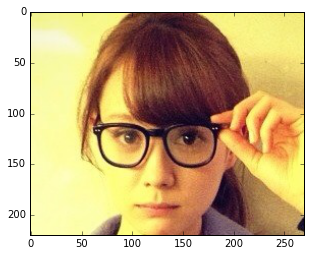

In [44]:
img = misc.imread('0.jpg')
#plt.imshow(img, cmap=plt.cm.gray, vmin=30, vmax=40)
plt.imshow(img[60:280, 180:450], cmap=plt.cm.gray) #第一個值是y,第二個是x

# 做nearest

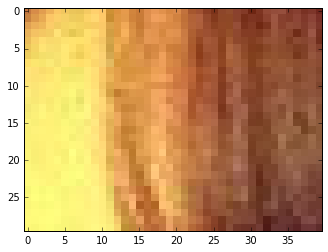

In [57]:
plt.imshow(img[120:150, 260:300], cmap=plt.cm.gray, interpolation='nearest')

# 圖片的裁剪和旋轉

(<matplotlib.axes._subplots.AxesSubplot at 0x16e63278>,
 <matplotlib.image.AxesImage at 0x170cd208>)

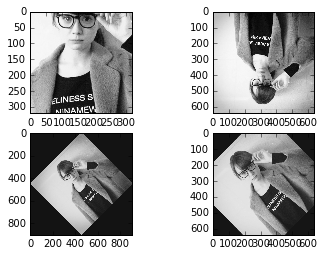

In [77]:
img = misc.imread('0.jpg','gray')
lx, ly = img.shape
# 剪切
crop_img = img[lx / 4: - lx / 4, ly / 4: - ly / 4]
# up <-> down 翻转
flip_ud_img = np.flipud(img)
# 旋转
rotate_img = ndimage.rotate(img, 45)
rotate_img_noreshape = ndimage.rotate(img, 45, reshape=False)

plt.subplot(221), plt.imshow(crop_img, cmap=plt.cm.gray)
plt.subplot(222),plt.imshow(flip_ud_img, cmap=plt.cm.gray)
plt.subplot(223),plt.imshow(rotate_img, cmap=plt.cm.gray)
plt.subplot(224),plt.imshow(rotate_img_noreshape, cmap=plt.cm.gray)

# 模糊或光滑

(<matplotlib.axes._subplots.AxesSubplot at 0x1a738b70>,
 <matplotlib.image.AxesImage at 0x1ab2ac50>)

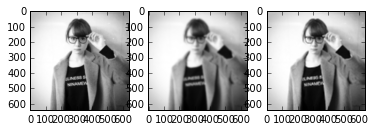

In [85]:
img = misc.imread('0.jpg','gray')

#高斯模糊
blurred_img = ndimage.gaussian_filter(img, sigma=3)   #模糊程度3
very_blurred = ndimage.gaussian_filter(img, sigma=5)  #模糊程度 5

#採用附近平均模糊
local_mean = ndimage.uniform_filter(img, size=11)

plt.subplot(131), plt.imshow(blurred_img, cmap=plt.cm.gray)
plt.subplot(132), plt.imshow(very_blurred, cmap=plt.cm.gray)
plt.subplot(133), plt.imshow(local_mean, cmap=plt.cm.gray)

## 銳化 

(<matplotlib.axes._subplots.AxesSubplot at 0x217f0ef0>,
 <matplotlib.image.AxesImage at 0x29ee8fd0>)

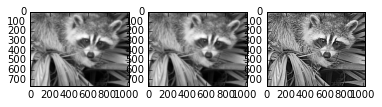

In [91]:
img = misc.imread('0.jpg','gray')

#先模糊
img = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(img, 5)

#在銳化，用Laplacian的近似值來加強邊緣的權重
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 50
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

plt.subplot(131), plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.subplot(132), plt.imshow(filter_blurred_f, cmap=plt.cm.gray)
plt.subplot(133), plt.imshow(sharpened, cmap=plt.cm.gray)

# 去噪

(<matplotlib.axes._subplots.AxesSubplot at 0x2e38aba8>,
 <matplotlib.image.AxesImage at 0x2e600240>)

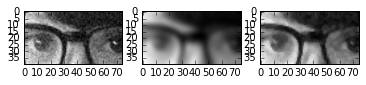

In [110]:
img = misc.imread('0.jpg','gray')

#製造噪音
img = img[160:200, 265:340]
noisy = img + 0.8 * img.std() * np.random.random(img.shape)

#用高斯濾波光滑邊緣
gauss_denoised = ndimage.gaussian_filter(noisy, 2)

#用範圍取中位數來保留比較好的邊緣
med_denoised = ndimage.median_filter(noisy, 3)

plt.subplot(131), plt.imshow(noisy, cmap=plt.cm.gray)
plt.subplot(132), plt.imshow(gauss_denoised, cmap=plt.cm.gray)
plt.subplot(133), plt.imshow(med_denoised, cmap=plt.cm.gray)

(<matplotlib.axes._subplots.AxesSubplot at 0x2f4b1a58>,
 <matplotlib.image.AxesImage at 0x2f661940>)

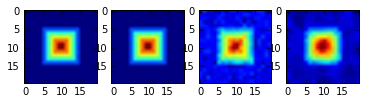

In [114]:
#中位數對直線效果更好

im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2 * np.random.randn(*im.shape)
im_med = ndimage.median_filter(im_noise, 3)

plt.subplot(141), plt.imshow(im)
plt.subplot(142), plt.imshow(im)
plt.subplot(143), plt.imshow(im_noise)
plt.subplot(144), plt.imshow(im_med)